In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
plt.rc('font', size=17)          # controls default text sizes
plt.rc('axes', titlesize=17)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=11.5)    # legend fontsize
plt.rc('figure', titlesize=17)  # fontsize of the figure title

In [3]:
df = pd.read_excel(r'data/primaryEnergy.xls')

In [4]:
df

,Region,Country/Year,2012,2013,2014,2015,2016,2017,2018 (P),% share in 2018
0,North America,Canada,324.7,337.0,341.8,339.0,338.2,343.7,344.4,2.5
1,North America,Mexico,184.2,185.0,184.1,184.0,186.4,189.3,186.9,1.3
2,North America,US,2148.5,2208.0,2232.9,2213.2,2212.7,2222.5,2300.6,16.6
3,North America,Total North America,2657.4,2730.1,2758.9,2736.2,2737.2,2755.5,2832.0,20.4
4,S. & Cent. America,Argentina,81.0,84.5,84.1,86.1,85.9,86.1,85.1,0.6
...,...,...,...,...,...,...,...,...,...,...
94,Asia Pacific,Thailand,116.5,118.3,121.6,124.7,127.3,130.2,133.0,1
95,Asia Pacific,Vietnam,53.4,57.2,62.6,69.1,73.9,75.8,85.8,0.6
96,Asia Pacific,Other Asia Pacific,48.3,48.8,52.7,53.9,60.5,62.4,65.4,0.5
97,Asia Pacific,Total Asia Pacific,5121.6,5274.4,5389.6,5475.7,5587.0,5748.0,5985.8,43.2


In [5]:
dumy = ['Country/Year', 2012, 2013, 2014, 2015, 2016, 2017, '2018 (P)']
x2012 = []
x2013 = []
x2014 = []
x2015 = []
x2016 = []
x2017 = []
x2018 = []
data_box = []
for i in range(99):
    if (df[dumy[0]][i].split()[0]!="Total"):
        x2012.append(df[dumy[1]][i])
        x2013.append(df[dumy[2]][i])
        x2014.append(df[dumy[3]][i])
        x2015.append(df[dumy[4]][i])
        x2016.append(df[dumy[5]][i])
        x2017.append(df[dumy[6]][i])
        x2018.append(df[dumy[7]][i])
x2012 = np.array(x2012)
x2013 = np.array(x2013)
x2014 = np.array(x2014)
x2015 = np.array(x2015)
x2016 = np.array(x2016)
x2017 = np.array(x2017)

In [6]:
combined = np.vstack((x2012, x2013, x2014, x2015, x2016, x2017, x2018)).T

In [7]:
cols=[2012, 2013, 2014, 2015, 2016, 2017, '2018 (P)']

In [8]:
row = df[:][98:99]
for col in df.columns: 
    if (col != "Region") and (col != "Country/Year") and (col != "2018 (P)") and (col != "% share in 2018"):
        array = row[cols].to_numpy()

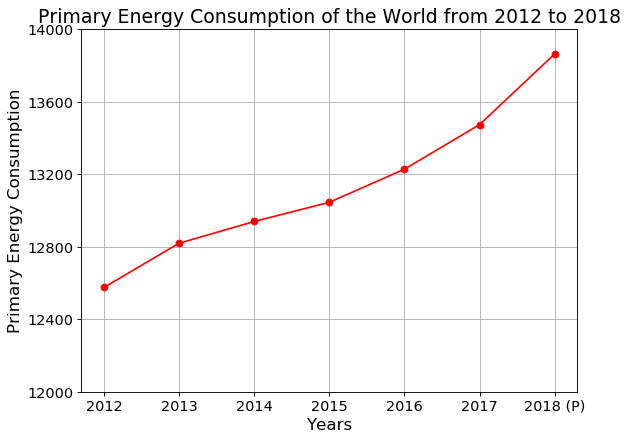

In [9]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
x1=cols
y1=array[0,:]
L1 = plt.plot(x1, y1, '-o', color='r', label='Hard boundary')
plt.xlabel('Years')
plt.ylabel('Primary Energy Consumption')
plt.ylim(12400,max(y1)+100)
ytick = np.linspace(12000, 14000, 6, endpoint = True)
plt.yticks(ytick)
plt.title("Primary Energy Consumption of the World from 2012 to 2018")
plt.grid()
plt.savefig('plots/lineplot.png',dpi=300,bbox_inches='tight')
plt.show()

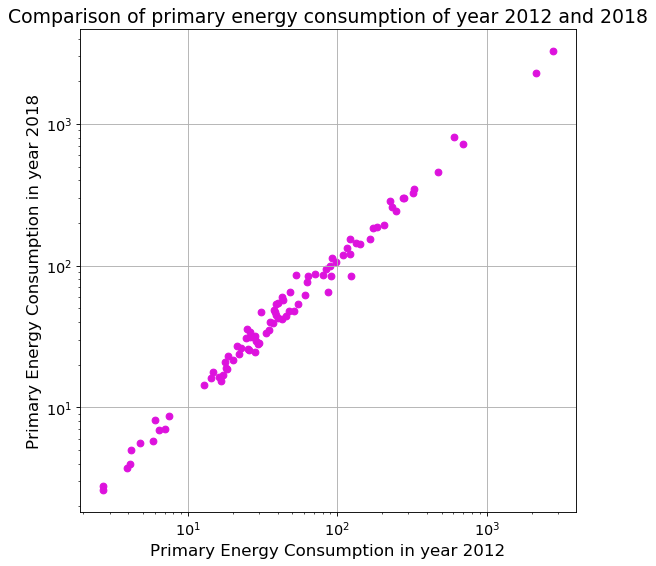

In [14]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x2012,x2018,color='#dd12dd',label="State/UT")
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Primary Energy Consumption in year 2012')
plt.ylabel('Primary Energy Consumption in year 2018')
plt.title('Comparison of primary energy consumption of year 2012 and 2018')
plt.grid()
plt.minorticks_on()
plt.savefig('plots/scatterPlot.png',dpi=300,bbox_inches='tight')
plt.show()

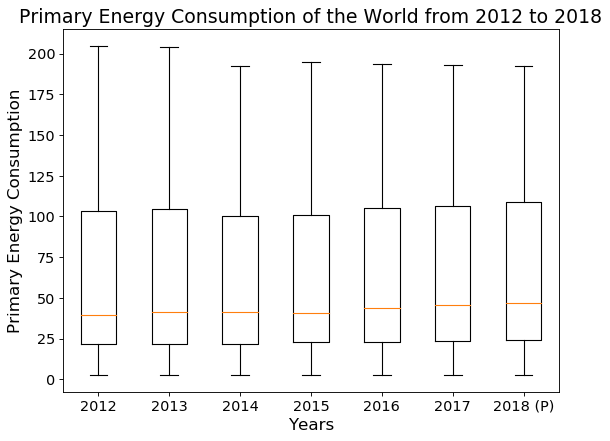

In [11]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(combined, showfliers=False)
plt.xticks([1, 2, 3, 4, 5, 6, 7], cols)
plt.xlabel('Years')
plt.ylabel('Primary Energy Consumption')
plt.title("Primary Energy Consumption of the World from 2012 to 2018")
plt.savefig('plots/boxplot_linear.png',dpi=300,bbox_inches='tight')
plt.show()

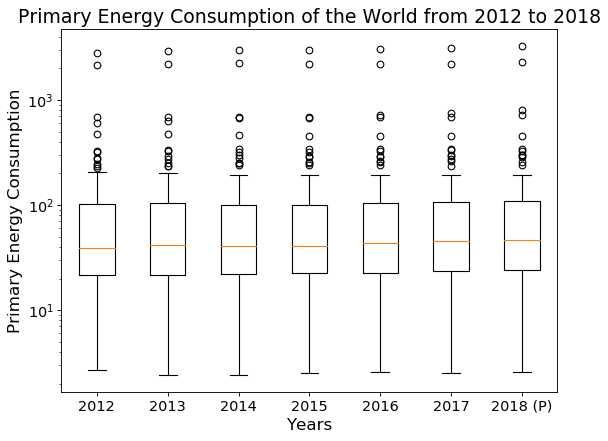

In [12]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(combined)
plt.yscale("log")
plt.xticks([1, 2, 3, 4, 5, 6, 7], cols)
plt.xlabel('Years')
plt.ylabel('Primary Energy Consumption')
plt.title("Primary Energy Consumption of the World from 2012 to 2018")
plt.savefig('plots/boxplot_log.png',dpi=300,bbox_inches='tight')
plt.show()